In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yt
#%matplotlib notebook

## Construct Gaussian initial fluctuations

In [4]:
nx = ny = nz = 64
lx = ly = lz = 30.0
N = 10.0

ntot = nx*ny*nz
ltot = lx*ly*lz

kx = np.fft.fftfreq(nx)*nx*2*np.pi/lx
ky = np.fft.fftfreq(ny)*ny*2*np.pi/ly
kz = np.fft.fftfreq(nz)*nz*2*np.pi/lz
mg = np.meshgrid(kx,ky,kz,indexing='ij')
ksq = sum(m**2 for m in mg)
phase = np.random.uniform(0., 2.*np.pi, ksq.shape)
psi_k = np.sqrt(np.exp(-ksq))*np.exp(1j*phase)
psi = np.fft.ifftn(psi_k)
av = sum(np.abs(psi.reshape(ntot))**2)*ltot/ntot
psi = psi*np.sqrt(N/av)

real = psi.real.reshape(ntot)
imag = psi.imag.reshape(ntot)
np.savetxt('initial.txt', np.column_stack((real,imag)))

## Check initial fluctuations

N = 9.999999999999977
n = 0.0003703703703703695
tau_gr = 7331.997958842267


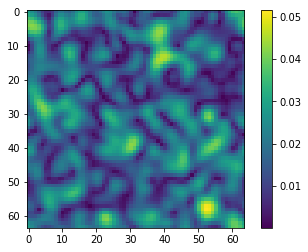

In [3]:
amp = np.abs(psi).reshape(ntot)
N = sum(amp**2)*ltot/ntot
n = sum(amp**2)/ntot
tau_gr = 0.9*np.sqrt(2.0)/12.0/np.pi**3/(n)**2/np.log(lx)

print("N =",N)
print("n =",n)
print("tau_gr =",tau_gr)

plt.imshow((amp[:nx*ny]).reshape((nx,ny)), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

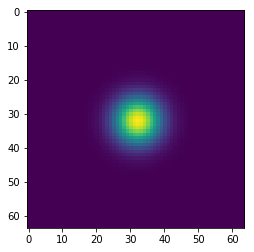

In [4]:
psitest = np.abs(np.fft.fftshift(np.fft.fftn(psi)))
plt.imshow(np.array(psitest[32]), interpolation="nearest", origin="upper")

## Slice through density at t=0  (Fig.1a in Levkov et.al.)

yt : [INFO     ] 2019-06-04 14:38:45,425 Parameters: current_time              = 0.5
yt : [INFO     ] 2019-06-04 14:38:45,427 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:38:45,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:38:45,429 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:38:46,362 Max Value is 4.19039e-03 at 20.3906250000000000 12.8906250000000000 26.0156250000000000
yt : [INFO     ] 2019-06-04 14:38:46,398 xlim = 5.390625 35.390625
yt : [INFO     ] 2019-06-04 14:38:46,399 ylim = -2.109375 27.890625
yt : [INFO     ] 2019-06-04 14:38:46,401 xlim = 5.390625 35.390625
yt : [INFO     ] 2019-06-04 14:38:46,402 ylim = -2.109375 27.890625
yt : [INFO     ] 2019-06-04 14:38:46,405 Making a fixed resolution buffer of (('boxlib', 'AxDens')) 800 by 800



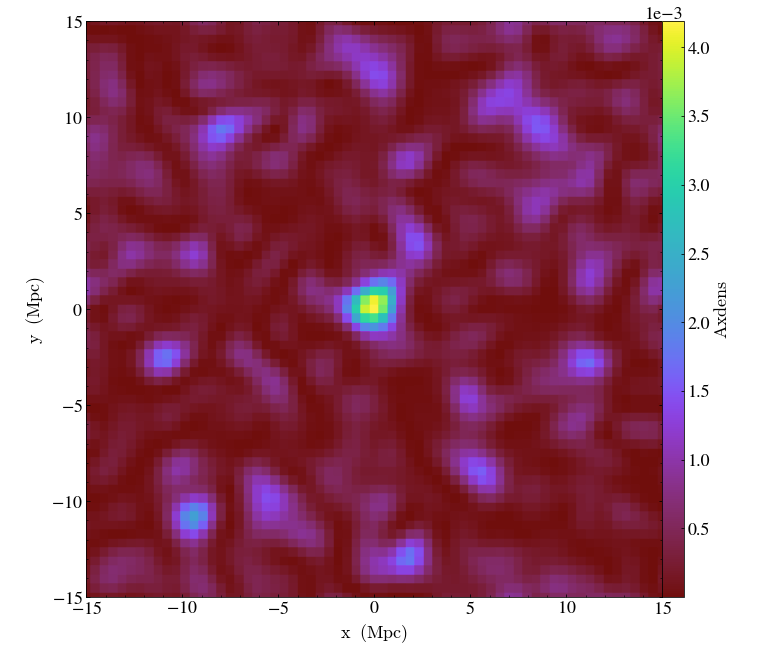

In [5]:
ds = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation/plt00002")
p= yt.SlicePlot(ds, 'z', 'AxDens', center=ds.find_max("AxDens")[1])
p.set_log("AxDens", False)
p.show()

## Slice through amplitude at t=1.5*tau_gr  (Fig.1b in Levkov et.al.)

yt : [INFO     ] 2019-06-04 14:38:48,111 Parameters: current_time              = 10965.0
yt : [INFO     ] 2019-06-04 14:38:48,112 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:38:48,114 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:38:48,116 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:38:48,871 Max Value is 1.41507e-02 at 16.6406250000000000 22.7343750000000000 17.5781250000000000
yt : [INFO     ] 2019-06-04 14:38:48,905 xlim = 1.640625 31.640625
yt : [INFO     ] 2019-06-04 14:38:48,906 ylim = 7.734375 37.734375
yt : [INFO     ] 2019-06-04 14:38:48,908 xlim = 1.640625 31.640625
yt : [INFO     ] 2019-06-04 14:38:48,908 ylim = 7.734375 37.734375
yt : [INFO     ] 2019-06-04 14:38:48,910 Making a fixed resolution buffer of (('boxlib', 'AxDens')) 800 by 800



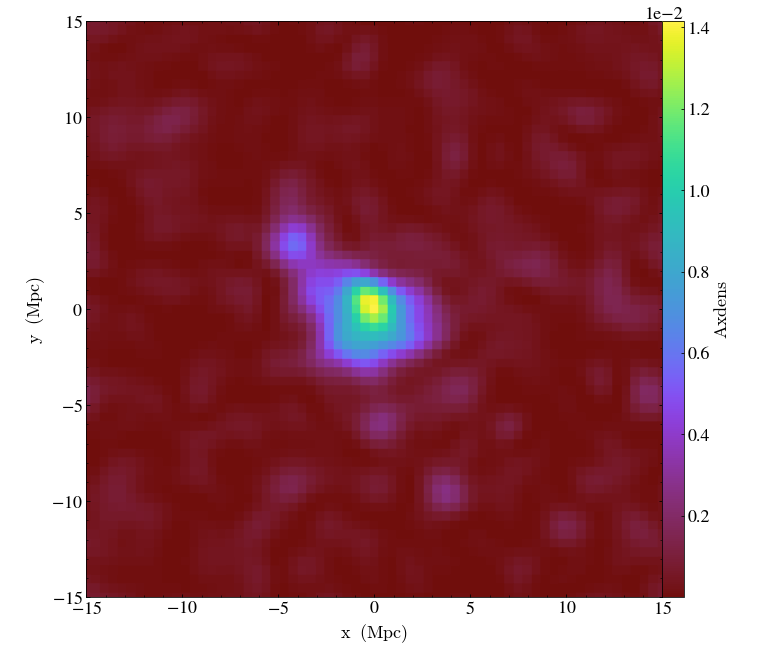

In [6]:
ds = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation/plt43860")
p = yt.SlicePlot(ds, 'z', 'AxDens', center=ds.find_max("AxDens")[1])
p.set_log("AxDens", False)
p.show()

## Radial profile of soliton (Fig.1c in Levkov et.al.)

yt : [INFO     ] 2019-06-04 14:38:50,309 Max Value is 1.41507e-02 at 16.6406250000000000 22.7343750000000000 17.5781250000000000


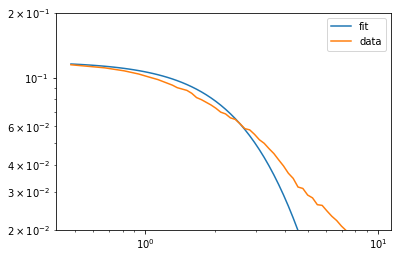

In [7]:
maximum = ds.find_max("AxDens")
my_sphere = ds.sphere(maximum[1], (10.0, "Mpc"))
p = yt.ProfilePlot(my_sphere, "radius", "AxDens", weight_field="cell_volume", accumulation=False)
p.set_unit("radius","Mpc") 
profile = p.profiles[0]
index = np.where(profile["AxDens"]>0)

#analytical fit
rc = maximum[0]**(-1.0/4.0)
profile_rev = [rc**(-2)/(1+0.23*(r/rc)**2)**4 for r in profile.x.v]

plt.loglog(profile.x,profile_rev,label='fit')
plt.loglog(profile.x[index],np.sqrt(profile["AxDens"][index]),label='data')
plt.ylim([0.02,0.2])
plt.legend()

## Evolution of conserved quantities

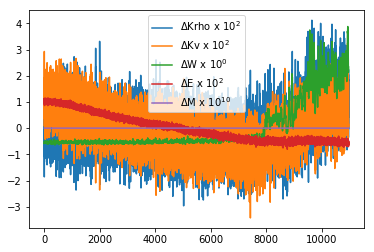

In [8]:
data = np.transpose(np.loadtxt('/home/uni09/cosmo/bschwab/axionyx/condensation/runlog', skiprows=1))

nstep = data[0]
time = data[1]
dt = data[2]
z = data[3]
mass_av = sum(data[4])/len(data[4])
mass = (data[4]-mass_av)/mass_av
epot_av = sum(data[5])/len(data[5])
epot = (data[5]-epot_av)/epot_av
ekinrho_av = sum(data[6])/len(data[6])
ekinrho = (data[6]-ekinrho_av)/ekinrho_av
ekinv_av = sum(data[7])/len(data[7])
ekinv = (data[7]-ekinv_av)/ekinv_av
etot_av = sum(data[8])/len(data[8])
etot = (data[8]-etot_av)/etot_av
max_dens = data[9]
a = data[10]


plt.plot(time,ekinrho*1.e+2,label='$\Delta$Krho x $10^2$')
plt.plot(time,ekinv*1.e+2,label='$\Delta$Kv x $10^2$')
plt.plot(time,epot*1.e+0,label='$\Delta$W x $10^0$')
plt.plot(time,etot*1.e+2,label='$\Delta$E x $10^2$')
plt.plot(time,mass*1.e+10,label='$\Delta$M x $10^{10}$')

#plt.ylim([-3.5,3.5])
plt.legend()

## Evolution of maximum amplitude (Fig.1d in Levkov et.al.)

max_dens_av = 0.06539910911172561


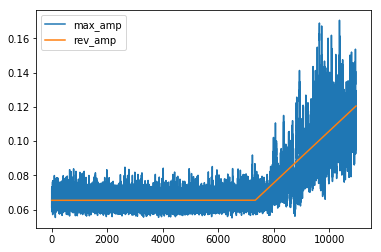

In [9]:
#Note that Levkov et.al. found c=3. Is it c(n,L,...) ?
c = 1.0/3.0 

#average maximum amplitude before condensation
max_dens_av = sum(np.sqrt(max_dens[:14700]))/len(max_dens[:14700])
print("max_dens_av =",max_dens_av)

#analytic growth of maximum amplitude
dens_rev = [np.piecewise(t, [t < tau_gr, t >= tau_gr], [max_dens_av, c**2*(t/tau_gr-1.0)+max_dens_av]) for t in time]

plt.plot(time,np.sqrt(max_dens),label='max_amp')
plt.plot(time,dens_rev,label='rev_amp')
plt.legend()

## Energy spectra F($\omega$,t)     (Fig.1e in Levkov et.al.)

In [10]:
def F1(omega,tau):
    ts = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation/plt?????")[:100] #change to your path and range
    tts = np.column_stack((ts,np.flip(ts)))
    return sum([(sum((ds[0].all_data()[("boxlib","AxRe")].v-1j*np.array(ds[0].all_data()[("boxlib","AxIm")].v))
                    *(ds[1].all_data()[("boxlib","AxRe")].v+1j*np.array(ds[1].all_data()[("boxlib","AxIm")].v)))
            *np.exp(1j*omega*(ds[1].current_time.v-ds[0].current_time.v)
                    -(ds[1].current_time.v-ds[0].current_time.v)**2/tau**2)) 
                for ds in tts])

omega = np.linspace(-1.0, 1.0, num=100)
tau = 20.0

F1 = F1(omega,tau)

yt : [INFO     ] 2019-06-04 14:40:03,012 Parameters: current_time              = 0.5
yt : [INFO     ] 2019-06-04 14:40:03,019 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:40:03,022 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:40:03,023 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:40:03,047 Parameters: current_time              = 1.0
yt : [INFO     ] 2019-06-04 14:40:03,048 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:40:03,049 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:40:03,050 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:40:03,103 Parameters: current_time              = 1.5
yt : [INFO     ] 2019-06-04 14:40:03,105 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:40:03,106 Parameters: domain_left_edge          = [0. 0. 0.]
yt 

In [11]:
def F2(omega,tau):
    ts = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation/plt?????")[14600:14800] #change to your path and range
    tts = np.column_stack((ts,np.flip(ts)))
    return sum([(sum((ds[0].all_data()[("boxlib","AxRe")].v-1j*np.array(ds[0].all_data()[("boxlib","AxIm")].v))
                    *(ds[1].all_data()[("boxlib","AxRe")].v+1j*np.array(ds[1].all_data()[("boxlib","AxIm")].v)))
            *np.exp(1j*omega*(ds[1].current_time.v-ds[0].current_time.v)
                    -(ds[1].current_time.v-ds[0].current_time.v)**2/tau**2)) 
                for ds in tts])

omega = np.linspace(-1.0, 1.0, num=100)
tau = 25.0

F2 = F2(omega,tau)

yt : [INFO     ] 2019-06-04 14:44:09,030 Parameters: current_time              = 7300.5
yt : [INFO     ] 2019-06-04 14:44:09,031 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:44:09,032 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:44:09,033 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:44:09,096 Parameters: current_time              = 7301.0
yt : [INFO     ] 2019-06-04 14:44:09,097 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:44:09,098 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:44:09,099 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:44:09,153 Parameters: current_time              = 7301.5
yt : [INFO     ] 2019-06-04 14:44:09,154 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:44:09,156 Parameters: domain_left_edge          = [0. 0

In [12]:
def F3(omega,tau):
    ts = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation/plt?????")[19900:20100] #change to your path and range
    tts = np.column_stack((ts,np.flip(ts)))
    return sum([(sum((ds[0].all_data()[("boxlib","AxRe")].v-1j*np.array(ds[0].all_data()[("boxlib","AxIm")].v))
                    *(ds[1].all_data()[("boxlib","AxRe")].v+1j*np.array(ds[1].all_data()[("boxlib","AxIm")].v)))
            *np.exp(1j*omega*(ds[1].current_time.v-ds[0].current_time.v)
                    -(ds[1].current_time.v-ds[0].current_time.v)**2/tau**2)) 
                for ds in tts])

omega = np.linspace(-1.0, 1.0, num=100)
tau = 25.0

F3 = F3(omega,tau)

yt : [INFO     ] 2019-06-04 14:51:39,241 Parameters: current_time              = 9950.5
yt : [INFO     ] 2019-06-04 14:51:39,244 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:51:39,247 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:51:39,248 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:51:39,310 Parameters: current_time              = 9951.0
yt : [INFO     ] 2019-06-04 14:51:39,314 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:51:39,315 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-04 14:51:39,316 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-06-04 14:51:39,364 Parameters: current_time              = 9951.5
yt : [INFO     ] 2019-06-04 14:51:39,365 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-04 14:51:39,367 Parameters: domain_left_edge          = [0. 0

/home/uni09/cosmo/bschwab/src/yt-conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/home/uni09/cosmo/bschwab/src/yt-conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


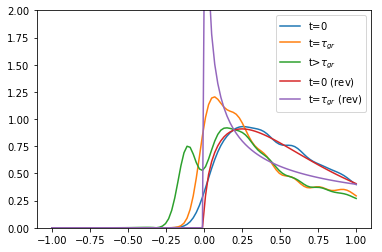

In [13]:
#arbitrary normalization factors
norm_rev = 3.0
norm2_rev = 0.4
norm = 0.0016

#initial spectrum (see Levkov et.al)
F_rev = [np.piecewise(om, [om <=0, om > 0], [0.0, norm_rev*np.sqrt(om)*np.exp(-2.0*om)]) for om in omega]

#thermal spectrum at t~tau_gr (this rough estimate can be improved by using eq.5 in Levkov et.al (Fig 1f)) 
F2_rev = [np.piecewise(om, [om <=0, om > 0], [0.0, norm2_rev/np.sqrt(om)]) for om in omega]

plt.plot(omega,np.abs(np.array(F1))*norm,label=r"t=$0$")
plt.plot(omega,np.abs(np.array(F2))*norm,label=r"t=$\tau_{gr}$")
plt.plot(omega,np.abs(np.array(F3))*norm,label=r"t>$\tau_{gr}$")
plt.plot(omega,F_rev,label=r"t=$0$ (rev)")
plt.plot(omega,F2_rev,label=r"t=$\tau_{gr}$ (rev)")
plt.ylim([0.0,2.0])
plt.legend()

In [ ]:
#def F(nstep,omega,tau):
#    ts = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation2/plt?????")[nstep:50] #change to your path
#    tts = np.column_stack((ts,np.flip(ts)))
#    #dst = ts[0]
#    dt = data[2][10]#ts[1].current_time.v-ts[0].current_time.v
#    return sum([(sum((ds[0].all_data()[("boxlib","AxRe")].v-1j*np.array(ds[0].all_data()[("boxlib","AxIm")].v))
#                    *(ds[1].all_data()[("boxlib","AxRe")].v+1j*np.array(ds[1].all_data()[("boxlib","AxIm")].v)))
#            *np.exp(1j*omega*(ds[1].current_time.v-ds[0].current_time.v)
#                    -(ds[1].current_time.v-ds[0].current_time.v)**2/tau**2)) 
#                for ds in tts])

#nstep = 0 #index of first used plot file - corresponds to time t=plotfile[nstep].current_time
#omega = np.linspace(-1.0, 1.0, num=100)
#tau = 20.0

#F = F(nstep,omega,tau)
#F = F/sum(F)*np.size(F)
#print(F)